In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [4]:
%pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 852 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=133d5f4367c0432743a26e587e5a3440eaa16a36369d8ff0687bd28de7255b8c
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

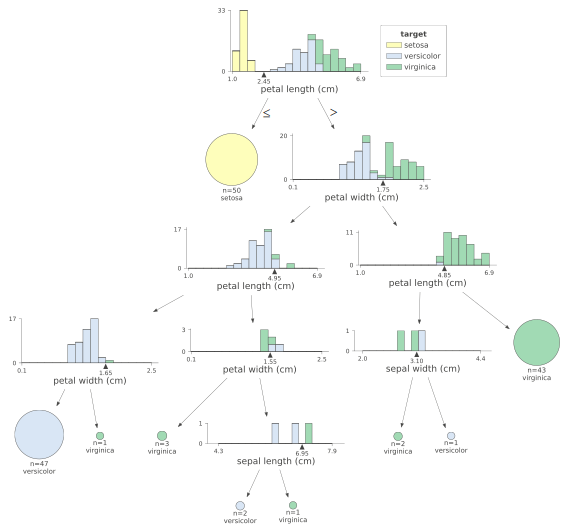

In [5]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mcol

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils.validation import column_or_1d

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import tree
from dtreeviz.trees import dtreeviz # remember to load the package

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import InputLayer, Activation, Dense, Dropout
from keras.callbacks import EarlyStopping

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = '/content/drive/MyDrive/Colab Notebooks/MVA/' # todo für Flos: den Ordner möglichst so verschieben, dass er im Gleichen Pfad im eurem Drive liegt
train_raw = pd.read_csv (path + 'data_filtered.csv')
data_test = pd.read_csv (path + 'data_test_filtered.csv')

train_raw.head()

,Survived,Pclass,Age,Fare,Name len,Female,Age known Flag,Fam_Size,Embarked number,Cabine known Flag,Numbert of Cabins
0,0,3,22.0,7.2500,23,0,1,1,1,0,1
1,1,1,38.0,71.2833,22,1,1,1,2,1,1
2,1,3,26.0,7.9250,22,1,1,0,1,0,1
3,1,1,35.0,53.1000,13,1,1,1,1,1,1
4,0,3,35.0,8.0500,24,0,1,0,1,0,1


In [11]:
import plotly.express as px
fig = px.scatter_3d(train_raw[train_raw['Female']==0], x='Age', y='Pclass', z='Embarked number',
              color='Survived')
fig.show()

In [66]:
fig = px.scatter_3d(train_raw, x='Age', y='Name len', z='Fare', color='Survived')
fig.show()

In [18]:
fig = px.scatter_3d(train_raw[train_raw['Female']==0], x='Age', y='Name len', z='Fare', color='Survived')
fig.show()

In [20]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

In [41]:
train_raw

,Survived,Pclass,Age,Fare,Name len,Female,Age known Flag,Fam_Size,Embarked number,Cabine known Flag,Numbert of Cabins,pred
0,0,3,22.00,7.2500,23,0,1,1,1,0,1,2
1,1,1,38.00,71.2833,22,1,1,1,2,1,1,1
2,1,3,26.00,7.9250,22,1,1,0,1,0,1,2
3,1,1,35.00,53.1000,13,1,1,1,1,1,1,1
4,0,3,35.00,8.0500,24,0,1,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,21,0,1,0,1,0,1,2
887,1,1,19.00,30.0000,28,1,1,0,1,1,1,3
888,0,3,21.75,23.4500,32,1,0,1,1,0,1,4
889,1,1,26.00,30.0000,21,0,1,0,2,1,1,4


In [52]:
kmeans = KMeans(init='random', n_clusters=8,
                    random_state=0, max_iter=10000)
y_predicted = kmeans.fit_predict(train_raw[["Female", "Pclass", "Age", "Fare", "Fam_Size", "Embarked number"]])

In [53]:
train_raw['pred']=pd.Series(y_predicted)

In [54]:
fig = px.scatter_3d(train_raw, x='Age', y='Female', z='Fam_Size', color='pred')
fig.show()

In [65]:
cluster_list = []
for x in range(0, 8):
    y = train_raw[train_raw["pred"]==x]
    y = int(round(y["Survived"].mean(), 0))
    cluster_list.append([x, y])
cluster_list

[[0, 1], [1, 1], [2, 0], [3, 1], [4, 0], [5, 1], [6, 0], [7, 0]]